<a href="https://colab.research.google.com/github/CesarRoldan99/CEE88_Cesar/blob/main/LAB7/LAB7_T1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [22]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [24]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

### Training the convnet on MNIST images

In [25]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [27]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 43s 56ms/step - loss: 0.4447 - accuracy: 0.8589 - val_loss: 0.0922 - val_accuracy: 0.9707
Epoch 2/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0601 - accuracy: 0.9810 - val_loss: 0.0505 - val_accuracy: 0.9845
Epoch 3/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0487 - val_accuracy: 0.9860
Epoch 4/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.0497 - val_accuracy: 0.9868
Epoch 5/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0420 - val_accuracy: 0.9895


#### evaluate model

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0273 - accuracy: 0.9916


0.991599977016449

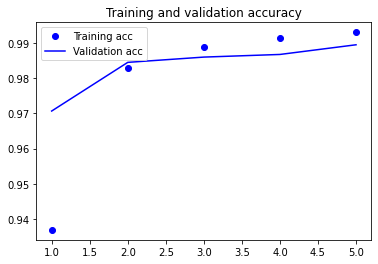

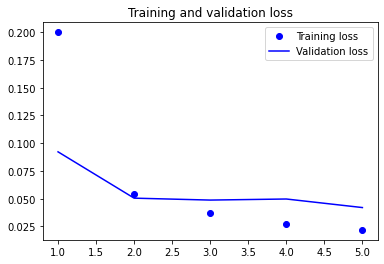

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [5]:
# Libraries
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np


In [6]:
# Model creation
def TModel(act='relu',opt='rmsprop'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=act, input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=act))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=act))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=act))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model


In [7]:
#KerasClassifier
Model = KerasClassifier(build_fn=TModel, epochs=3, batch_size=10)

In [8]:
#Parameters for GridSearch
param = {'act':('relu','sigmoid','selu'), 'opt':('rmsprop','Adam','SGD')}
train_labels_Up = np.argmax(train_labels, axis=1)

In [9]:
#GridSearch
grid =GridSearchCV(Model,param,scoring='accuracy')
grid_results = grid.fit(train_images,train_labels_Up) 

Epoch 1/3
4800/4800 [==============================] - 55s 11ms/step - loss: 0.2896 - accuracy: 0.9061
Epoch 2/3
4800/4800 [==============================] - 52s 11ms/step - loss: 0.0537 - accuracy: 0.9843
Epoch 3/3
4800/4800 [==============================] - 52s 11ms/step - loss: 0.0417 - accuracy: 0.9882


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/3
4800/4800 [==============================] - 54s 11ms/step - loss: 0.2782 - accuracy: 0.9087
Epoch 2/3
4800/4800 [==============================] - 53s 11ms/step - loss: 0.0517 - accuracy: 0.9850
Epoch 3/3
4800/4800 [==============================] - 54s 11ms/step - loss: 0.0436 - accuracy: 0.9887
Epoch 1/3
4800/4800 [==============================] - 59s 12ms/step - loss: 0.2838 - accuracy: 0.9097
Epoch 2/3
4800/4800 [==============================] - 53s 11ms/step - loss: 0.0514 - accuracy: 0.9851
Epoch 3/3
4800/4800 [==============================] - 53s 11ms/step - loss: 0.0385 - accuracy: 0.9894
Epoch 1/3
4800/4800 [==============================] - 55s 11ms/step - loss: 0.2670 - accuracy: 0.9143
Epoch 2/3
4800/4800 [==============================] - 54s 11ms/step - loss: 0.0529 - accuracy: 0.9860
Epoch 3/3
4800/4800 [==============================] - 53s 11ms/step - loss: 0.0362 - accuracy: 0.9905
Epoch 1/3
4800/4800 [==============================] - 54s 11ms/step - lo

In [11]:
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.987217 using {'act': 'relu', 'opt': 'Adam'}
0.984200 (0.002615) with: {'act': 'relu', 'opt': 'rmsprop'}
0.987217 (0.002249) with: {'act': 'relu', 'opt': 'Adam'}
0.980917 (0.001599) with: {'act': 'relu', 'opt': 'SGD'}
0.977150 (0.002601) with: {'act': 'sigmoid', 'opt': 'rmsprop'}
0.982400 (0.001116) with: {'act': 'sigmoid', 'opt': 'Adam'}
0.112367 (0.003342) with: {'act': 'sigmoid', 'opt': 'SGD'}
0.980300 (0.003443) with: {'act': 'selu', 'opt': 'rmsprop'}
0.981083 (0.001575) with: {'act': 'selu', 'opt': 'Adam'}
0.981800 (0.001505) with: {'act': 'selu', 'opt': 'SGD'}


In [14]:
model = TModel(act='relu',opt='Adam')

In [15]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 39s 52ms/step - loss: 0.5043 - accuracy: 0.8414 - val_loss: 0.0663 - val_accuracy: 0.9784
Epoch 2/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0593 - accuracy: 0.9816 - val_loss: 0.0445 - val_accuracy: 0.9861
Epoch 3/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0561 - val_accuracy: 0.9830
Epoch 4/5
750/750 [==============================] - 39s 52ms/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 5/5
750/750 [==============================] - 39s 51ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0391 - val_accuracy: 0.9883


In [16]:
#Accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 9ms/step - loss: 0.0306 - accuracy: 0.9894


0.9894000291824341

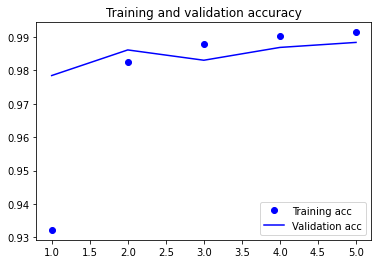

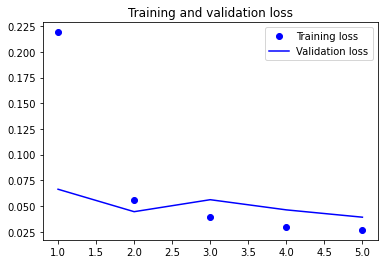

In [17]:
#Plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()